In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import cv2

In [2]:
print(tf.__version__)

2.3.0


In [3]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.efficientnet import preprocess_input

In [4]:
import numpy as np
from scipy import signal, misc, ndimage
from skimage import filters, feature, img_as_float
from skimage.io import imread
from skimage.color import rgb2gray, gray2rgb
from PIL import Image, ImageFilter
import matplotlib.pylab as pylab
import matplotlib.pyplot as plt
import matplotlib
from skimage.filters import laplace
from skimage import io

In [5]:
# C:\Users\patel\Desktop\Mini_Project\dMini_Projectataset\individual\elbow
training_dir = "C:/Users/patel/Desktop/Mini_Project/dataset/individual/wrist/train/"
testing_dir  = "C:/Users/patel/Desktop/Mini_Project/dataset/individual/wrist/validation/"


print("DATA IMPORTING FROM THE DIRECTORY...")
training_datagen = ImageDataGenerator(
    preprocessing_function = preprocess_input,
    validation_split=0.2,
#     rescale = 1./255,
#     horizontal_flip = True,
#     vertical_flip = True,
    rotation_range = 15,
    fill_mode = 'nearest'
)


training_gen = training_datagen.flow_from_directory(
    training_dir,
    target_size = (256,256),
    shuffle=True,
    class_mode = 'categorical',
    batch_size = 32,
    subset= 'training'
)

validation_gen = training_datagen.flow_from_directory(
    training_dir,
    target_size = (256,256),
    shuffle = True,
    class_mode = 'categorical',
    batch_size = 16,
    subset = 'validation'
)
print("DATA LOADED")

DATA IMPORTING FROM THE DIRECTORY...
Found 7802 images belonging to 2 classes.
Found 1950 images belonging to 2 classes.
DATA LOADED


In [6]:
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Input, Dropout, BatchNormalization, MaxPooling2D, Conv2D,Flatten
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.callbacks import EarlyStopping

In [7]:
# #Trial 1

# model = Sequential([
#     Conv2D(64, 7, activation='relu',padding='same',input_shape=[224,224,3]),
#     MaxPooling2D(2),
#     Conv2D(128,3,padding = 'same',activation='relu'),
#     Conv2D(128,3,padding = 'same',activation='relu'),
#     MaxPooling2D(2),
#     Conv2D(256,3,padding = 'same',activation='relu'),
#     Conv2D(256,3,padding = 'same',activation='relu'),
#     MaxPooling2D(2),
#     Flatten(),
#     Dense(128,activation='relu'),
#     Dropout(0.3),
#     Dense(64,activation='relu'),
#     Dropout(0.25),
#     Dense(2,activation='softmax')
# ])

In [8]:
#trial - 2 - EffNetB0
from tensorflow.keras.applications import EfficientNetB0

base_model = EfficientNetB0(
    input_shape=(256,256,3),
    include_top = False,
    weights = 'imagenet'
)

for layer in base_model.layers[:-22]:
    layer.trainable = False

x = Flatten()(base_model.output)


x = Dropout(0.3)(x)
x = Dense(32,activation = 'relu')(x)
x = Dropout(0.25)(x)
x = Dense(16,activation = 'relu')(x)
x = Dense(2, activation = 'softmax')(x)

model = tf.keras.Model(base_model.input, x)

In [9]:
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
rescaling (Rescaling)           (None, 256, 256, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
normalization (Normalization)   (None, 256, 256, 3)  7           rescaling[0][0]                  
__________________________________________________________________________________________________
stem_conv_pad (ZeroPadding2D)   (None, 257, 257, 3)  0           normalization[0][0]              
_______________________________________________________________________________________

In [10]:
my_callback = EarlyStopping(
    patience=5,
    monitor = 'val_loss',
    min_delta = 0.0005
)
adam = Adam(learning_rate=0.001)

model.compile(optimizer=Adam(),loss='categorical_crossentropy',metrics=['acc'])

history = model.fit(
    training_gen,
    epochs = 50,
    validation_data= validation_gen,
)

Epoch 1/50
244/244 [==============================] - 154s 632ms/step - loss: 0.6162 - acc: 0.6656 - val_loss: 0.4559 - val_acc: 0.7836
Epoch 2/50
244/244 [==============================] - 149s 613ms/step - loss: 0.5172 - acc: 0.7498 - val_loss: 0.4394 - val_acc: 0.8056
Epoch 3/50
244/244 [==============================] - 158s 648ms/step - loss: 0.4698 - acc: 0.7776 - val_loss: 0.3917 - val_acc: 0.8349
Epoch 4/50
244/244 [==============================] - 135s 553ms/step - loss: 0.4526 - acc: 0.7890 - val_loss: 0.3412 - val_acc: 0.8626
Epoch 5/50
244/244 [==============================] - 139s 570ms/step - loss: 0.4246 - acc: 0.8126 - val_loss: 0.4214 - val_acc: 0.8221
Epoch 6/50
244/244 [==============================] - 149s 611ms/step - loss: 0.4203 - acc: 0.8059 - val_loss: 0.3778 - val_acc: 0.8297
Epoch 7/50
244/244 [==============================] - 148s 606ms/step - loss: 0.4019 - acc: 0.8150 - val_loss: 0.3423 - val_acc: 0.8590
Epoch 8/50
244/244 [============================

In [11]:
import matplotlib.pyplot as plt

        loss       acc  val_loss   val_acc
0   0.616226  0.665599  0.455894  0.783590
1   0.517214  0.749808  0.439435  0.805641
2   0.469790  0.777621  0.391742  0.834872
3   0.452561  0.789028  0.341240  0.862564
4   0.424601  0.812612  0.421366  0.822051
5   0.420251  0.805947  0.377764  0.829744
6   0.401854  0.815047  0.342310  0.858974
7   0.392258  0.827865  0.373468  0.862564
8   0.363619  0.835555  0.374288  0.851282
9   0.358584  0.837221  0.413747  0.832308
10  0.337518  0.847347  0.390194  0.816923
11  0.312006  0.860292  0.358192  0.852308
12  0.321994  0.856063  0.376238  0.834359
13  0.317909  0.861061  0.412954  0.825128
14  0.291800  0.874135  0.374330  0.840513
15  0.269770  0.879646  0.444147  0.825641
16  0.292005  0.876955  0.538488  0.804103
17  0.255455  0.888490  0.412466  0.833846
18  0.249211  0.889772  0.457982  0.820513
19  0.227786  0.902974  0.514034  0.806154
20  0.224516  0.907844  0.485012  0.814359
21  0.194783  0.916175  0.452427  0.841026
22  0.20579

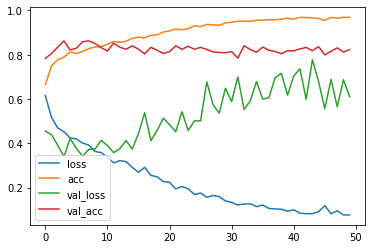

In [12]:
history_df = pd.DataFrame(history.history)
print(history_df)
history_df.plot()
plt.show()

In [13]:
import numpy as np 
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import os
import shutil
from tensorflow.keras.applications.efficientnet import preprocess_input

In [14]:
def testing(path):
    files = os.listdir(path)
    df = pd.DataFrame(columns=['patient_id','number_of_images' ,'actual_diagnosis','prediction_negative_array','prediction_positive_array','predicted_diagnosis'])
    for f1 in files:
        file_p_n = os.listdir(path+'/'+f1)
        for f2 in file_p_n:
            p_n_str = f2.split('_')[1]
            img_files = os.listdir(path+'/'+f1+'/'+f2)
            n_imgs = len(img_files)
            pos_array = []
            neg_array = []
            for f3 in img_files:
                img = image.load_img(path+'/'+f1+'/'+f2+'/'+f3,target_size=(256,256))
                img = image.img_to_array(img)
                img = preprocess_input(img)
                img = np.expand_dims(img, axis = 0)
                prediction = model.predict(img)
#                 print(prediction)
                pos_array.append(prediction[0][1])
                neg_array.append(prediction[0][0])
            final_n = np.mean(neg_array)
            final_p = np.mean(pos_array)
            if final_p >= final_n:
                result = 'positive'
            else:
                result = 'negative'
            df = df.append({'patient_id':f1,'number_of_images':n_imgs,'actual_diagnosis':p_n_str,'prediction_negative_array':neg_array,'prediction_positive_array':pos_array,'predicted_diagnosis':result},ignore_index=True)
    return df

In [15]:
wrist_testing = testing("C:/Users/patel/Desktop/Mini_Project/MURA-v1.1/MURA-v1.1/valid/XR_WRIST")

In [16]:
# df1 = pd.read_csv('elbow_eff_83.csv')
df1 = wrist_testing
cnt = 0
for i in range(148):
    if df1.iloc[i]["actual_diagnosis"] == df1.iloc[i]['predicted_diagnosis']:
        cnt+=1

print("Accuracy :",(cnt/158)*100)

Accuracy : 74.68354430379746


In [17]:
tp, tn, fp, fn = 0, 0, 0, 0

for i in range(153):
    if (df1.iloc[i]["actual_diagnosis"] == "positive") and  (df1.iloc[i]['predicted_diagnosis']=="positive"):
        tp += 1
    elif (df1.iloc[i]["actual_diagnosis"] == "positive") and  (df1.iloc[i]['predicted_diagnosis']=="negative"):
        fn += 1
    elif (df1.iloc[i]["actual_diagnosis"] == "negative") and  (df1.iloc[i]['predicted_diagnosis']=="positive"):
        fp += 1
    else:
        tn +=1

In [18]:
print("True Positive :", tp)
print("True Negative :", tn)
print("False Positive :", fp)
print("False Negative :", fn)


True Positive : 68
True Negative : 55
False Positive : 1
False Negative : 29


In [19]:
model.save_weights('wrist_model.h5')